### Announcements
* SQL Sessions from wed-friday ( 3 sessions )
* 1 additional session on visualization


### Objectives
* Understanding Linear Models
* Understanding Non-Linear Models
* Linear Regression using scikit-learn
* The Loss Function
* Gradient Descent Algorithm for weight optimization
* Implement Linear Regression using NumPy

<hr>

<img src="https://developers.google.com/machine-learning/crash-course/images/CricketPoints.svg">

### What can we say from the data ?
1. Cricket Chrips per min increases with Temperature
2. This is what is called linear relationship 
3. Target is continues, thus regresion problem
4. Can we predict line such that target can temp can be predicted using chirps per min?

<img src="https://developers.google.com/machine-learning/crash-course/images/CricketLine.svg">

* Possibilities of lines are infinite.
* Which of the possibilities of lines is the best line?

<img src="https://developers.google.com/machine-learning/crash-course/images/LossSideBySide.png">

* We need a way to measure & quantify a line if it is better than others.
* $Loss = 1/N (predicted - actual)^2$
* N, is number of data points
* Thus, we have to find a line whose Loss is least

### How is a line represented ?
* $y = w1*x1 + w0$
* w1 is slope & w0 is intercept
* Thus, our problem statement becomes finding the (w0,w1) for which loss is least
* The Optimization function : Mathematically, We have to minimize the loss by changing w0 & w1 or weights

### Understanding non-linear models

In [2]:
from sklearn.datasets import make_blobs

In [10]:
X,_ = make_blobs(n_features=2, cluster_std=10)

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Y')

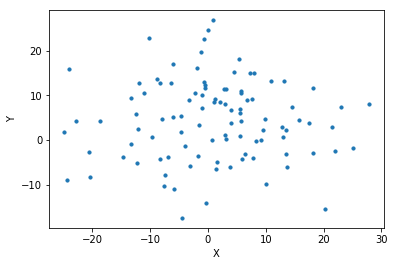

In [13]:
plt.scatter(X[:,0],X[:,1],s=10)
plt.xlabel('X')
plt.ylabel('Y')

* Linear models won't work for such data, there is no linear relationship between X & Y
* Use non-linear models here

### Using Linear Regression with scikit-learn

In [14]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [26]:
X,y = make_regression(n_features=1, n_samples=100, noise=15)

Text(0, 0.5, 'y')

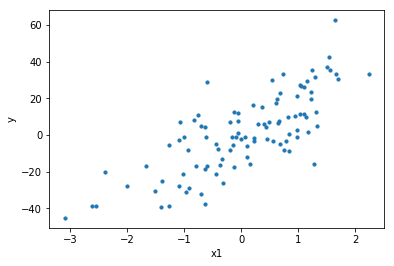

In [28]:
plt.scatter(X,y, s=10)
plt.xlabel('x1')
plt.ylabel('y')

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
out = lr.predict(X)

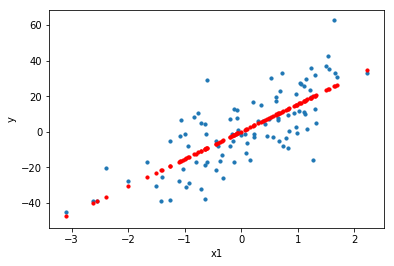

In [37]:
plt.scatter(X,y, s=10)
plt.xlabel('x1')
plt.ylabel('y')
plt.scatter(X,out,s=10,c='r')

In [38]:
lr.coef_

array([15.38648628])

In [39]:
lr.intercept_

0.23886675536490787

In [40]:
lr.predict(X[:1])

array([-0.79170976])

In [42]:
X[:1]

array([[-0.06697933]])

In [43]:
15.38648628 * -0.06697933 + 0.23886675536490787

-0.7917097867236845

In [44]:
lr.coef_ * X[:1] + lr.intercept_

array([[-0.79170976]])

In [57]:
X,y = make_regression(n_features=3, n_samples=100, noise=15)

In [58]:
lr = LinearRegression()

In [59]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
lr.coef_

array([86.67829655, 43.86458943, 47.84733362])

In [61]:
lr.intercept_

-0.8972039768434756

In [62]:
import numpy as np

In [63]:
np.sum(lr.coef_ * X[:2], axis=1) + lr.intercept_

array([ 87.43085275, -93.00825712])

In [64]:
lr.predict(X[:2])

array([ 87.43085275, -93.00825712])

* For 10 features & 1 target, number of weights will be 10

In [65]:
import pandas as pd

/home/awantik/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [66]:
from sklearn.datasets import california_housing

In [68]:
data = california_housing.fetch_california_housing()

In [70]:
data.data.shape

(20640, 8)

In [71]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [72]:
data.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

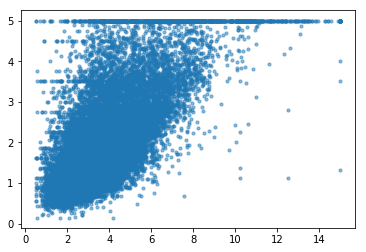

In [76]:
plt.scatter(data.data[:,0], data.target,s=10,alpha=.5)

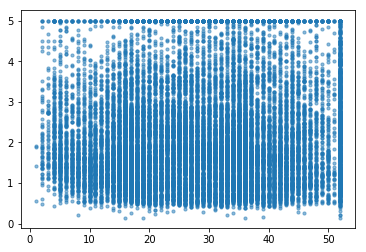

In [77]:
plt.scatter(data.data[:,1], data.target,s=10,alpha=.5)

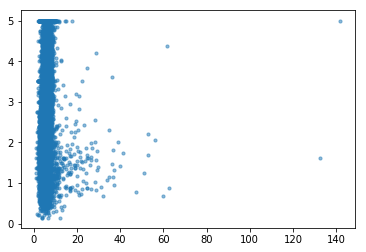

In [78]:
plt.scatter(data.data[:,2], data.target,s=10,alpha=.5)

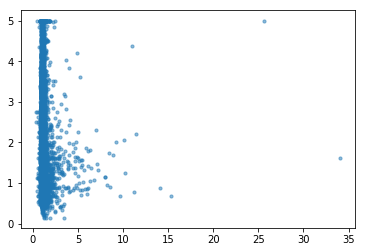

In [79]:
plt.scatter(data.data[:,3], data.target,s=10,alpha=.5)

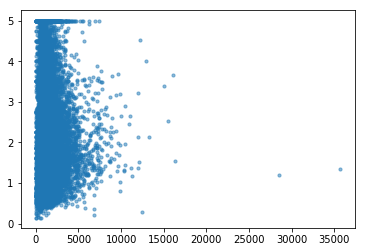

In [80]:
plt.scatter(data.data[:,4], data.target,s=10,alpha=.5)

In [81]:
import pandas as pd

In [83]:
house_data = pd.DataFrame(data.data, columns=data.feature_names)

In [84]:
house_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [87]:
house_data[house_data.AveBedrms > 10]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1240,3.1250,11.0,47.515152,11.181818,82.0,2.484848,38.42,-120.19
1912,4.9750,16.0,56.269231,10.153846,54.0,2.076923,39.01,-120.16
1913,4.0714,19.0,61.812500,11.000000,112.0,2.333333,39.01,-120.06
1914,1.8750,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10
1979,4.6250,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08
2395,3.8750,23.0,50.837838,10.270270,64.0,1.729730,37.12,-119.34
9676,3.2431,14.0,52.848214,11.410714,265.0,2.366071,37.64,-119.02
11862,2.6250,25.0,59.875000,15.312500,28.0,1.750000,40.27,-121.25
12447,1.6154,17.0,62.422222,14.111111,83.0,1.844444,33.97,-114.49


In [88]:
house_data['Price'] = data.target

In [91]:
house_data = house_data[house_data.AveBedrms < 20]

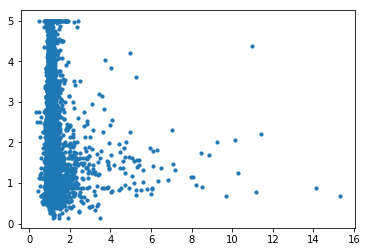

In [92]:
plt.scatter(house_data.AveBedrms, house_data.Price, s=10)

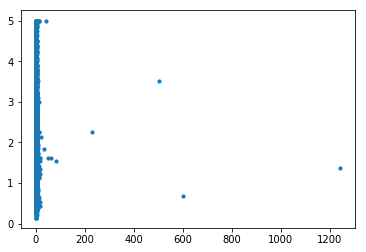

In [119]:
plt.scatter(house_data.AveOccup, house_data.Price, s=10)

In [94]:
lr = LinearRegression()

In [138]:
lr.fit(house_data.drop(columns=['Price']), house_data.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
lr.coef_

array([ 4.46747780e-01,  9.52807138e-03, -1.25019476e-01,  7.77453808e-01,
       -2.97216866e-06, -3.81744254e-03, -4.19046986e-01, -4.33186953e-01])

In [140]:
from sklearn.metrics import mean_squared_error, r2_score

In [141]:
pred = lr.predict(house_data.drop(columns=['Price']))

In [142]:
mean_squared_error(y_pred=pred, y_true=house_data.Price)

0.5204759442597213

In [143]:
r2_score(y_pred=pred, y_true=house_data.Price)

0.6090331540811058

### Common Questions for Interviews
* Does Linear Regression need scaling?
* A. No
* Why?
* A. The model coef_ takes care of scale of the data.
* Does Linear Regression do scaling internally
* A. yes,
* Why?
* So that coef tell comparable importance of features

In [144]:
lr.coef_

array([ 4.46747780e-01,  9.52807138e-03, -1.25019476e-01,  7.77453808e-01,
       -2.97216866e-06, -3.81744254e-03, -4.19046986e-01, -4.33186953e-01])

In [145]:
house_data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119029,0.386155,-0.076197,0.004796,0.018766,-0.079771,-0.015185,0.688343
HouseAge,-0.119029,1.000000,-0.182391,-0.100416,-0.296222,0.013193,0.011118,-0.108188,0.105606
AveRooms,0.386155,-0.182391,1.000000,0.789850,-0.077378,-0.005407,0.115832,-0.030776,0.171670
AveBedrms,-0.076197,-0.100416,0.789850,1.000000,-0.073975,-0.007376,0.076362,0.018649,-0.064961
Population,0.004796,-0.296222,-0.077378,-0.073975,1.000000,0.069862,-0.108625,0.099750,-0.024527
AveOccup,0.018766,0.013193,-0.005407,-0.007376,0.069862,1.000000,0.002374,0.002475,-0.023738
Latitude,-0.079771,0.011118,0.115832,0.076362,-0.108625,0.002374,1.000000,-0.924732,-0.144361
Longitude,-0.015185,-0.108188,-0.030776,0.018649,0.099750,0.002475,-0.924732,1.000000,-0.045946
Price,0.688343,0.105606,0.171670,-0.064961,-0.024527,-0.023738,-0.144361,-0.045946,1.000000


### Tasks for tomorrow for understanding Gradient Descent
* Revise differencial calculus
* Power Rule
* https://www.mathsisfun.com/calculus/